In [21]:
import numpy as np
import gymnasium as gym
from util import transition_kernel, value_iteration, plot_convergence, plot_value_grid, plot_policy_arrows

In [22]:
gamma = 0.9
tol = 1e-6

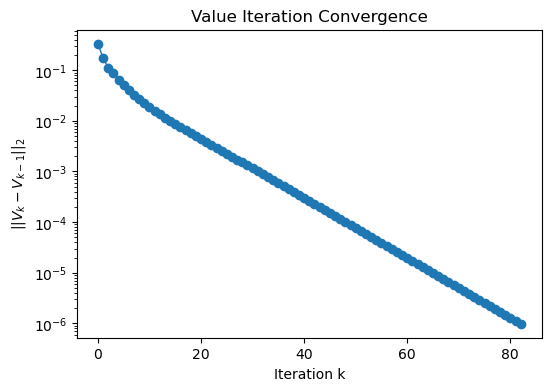

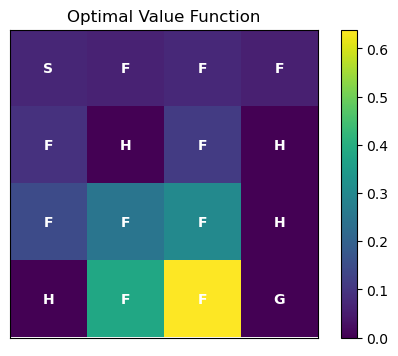

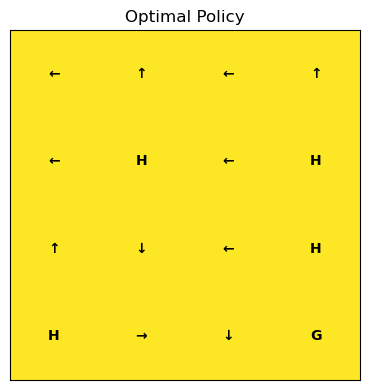

Optimal Value Function:
 [[0.0689 0.0614 0.0744 0.0558]
 [0.0919 0.     0.1122 0.    ]
 [0.1454 0.2475 0.2996 0.    ]
 [0.     0.3799 0.639  0.    ]]

Optimal policy (0:L,1:D,2:R,3:U):
 [[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]

Optimal Q* (rows=states, cols=actions [L,D,R,U]):
 [[0.0689 0.0666 0.0666 0.0598]
 [0.0391 0.043  0.0407 0.0614]
 [0.0744 0.0688 0.0727 0.0575]
 [0.0391 0.0391 0.0335 0.0558]
 [0.0919 0.0712 0.0643 0.0482]
 [0.     0.     0.     0.    ]
 [0.1122 0.0899 0.1122 0.0223]
 [0.     0.     0.     0.    ]
 [0.0712 0.1179 0.1018 0.1454]
 [0.1576 0.2475 0.2039 0.1335]
 [0.2996 0.266  0.2254 0.1079]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.1882 0.3057 0.3799 0.266 ]
 [0.3956 0.639  0.6149 0.5372]
 [0.     0.     0.     0.    ]]


In [23]:
env = gym.make(
    'FrozenLake-v1',
    desc=None,
    map_name="4x4",
    is_slippery=True,
)
desc = env.unwrapped.desc   
P, nS, nA = transition_kernel(env)

V_star, pi_star, Q_star, deltas = value_iteration(P, nS, nA, gamma=gamma, tol=tol)

plot_convergence(deltas)
plot_value_grid(V_star, desc, title='Optimal Value Function')
plot_policy_arrows(pi_star, desc, title='Optimal Policy')

np.set_printoptions(precision=4, suppress=True)
print("Optimal Value Function:\n", V_star.reshape(desc.shape))
print("\nOptimal policy (0:L,1:D,2:R,3:U):\n", pi_star.reshape(desc.shape))
print("\nOptimal Q* (rows=states, cols=actions [L,D,R,U]):\n", Q_star)
